In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# showing data

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Showing Null Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Droping unusefull columns

In [4]:
df.drop(["PassengerId" , "Cabin" , "Name"] , axis=1 , inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Dealing with Null Values

In [6]:
nul_val = df[df["Age"].isna()]
nul_val

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,male,NaN,0,0,330877,8.4583,Q
17,1,2,male,NaN,0,0,244373,13.0000,S
19,1,3,female,NaN,0,0,2649,7.2250,C
26,0,3,male,NaN,0,0,2631,7.2250,C
28,1,3,female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,2629,7.2292,C
863,0,3,female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,male,NaN,0,0,345777,9.5000,S
878,0,3,male,NaN,0,0,349217,7.8958,S


## Filling Null Values with Median

In [7]:
df["Age"] = df['Age'].fillna(value=df['Age'].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Define null Rows and Dropping Them

In [9]:
defin_rows = df[df["Embarked"].isna()]["Embarked"].index
defin_rows

Int64Index([61, 829], dtype='int64')

In [10]:
df = df.drop(defin_rows)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


## Convert Discreet Columns to (Category)

In [12]:
df[["Survived" , "Pclass" , "SibSp" , "Parch" , "Age"]].astype("category")

,Survived,Pclass,SibSp,Parch,Age
0,0,3,1,0,22.0
1,1,1,1,0,38.0
2,1,3,0,0,26.0
3,1,1,1,0,35.0
4,0,3,0,0,35.0
...,...,...,...,...,...
886,0,2,0,0,27.0
887,1,1,0,0,19.0
888,0,3,1,2,28.0
889,1,1,0,0,26.0


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


## Data Visulaization

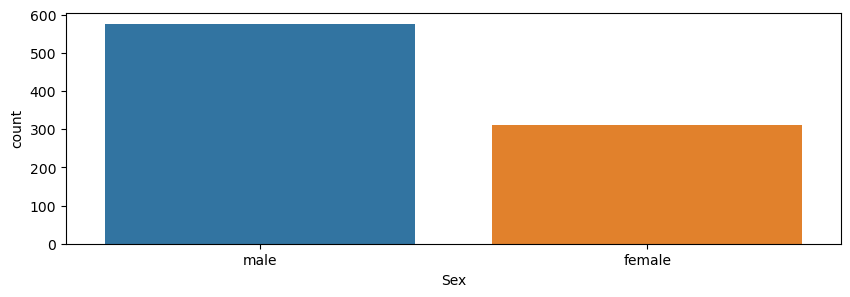

In [16]:
plt.figure(figsize=(10,3))
sns.countplot(x="Sex",data=df)
plt.show()

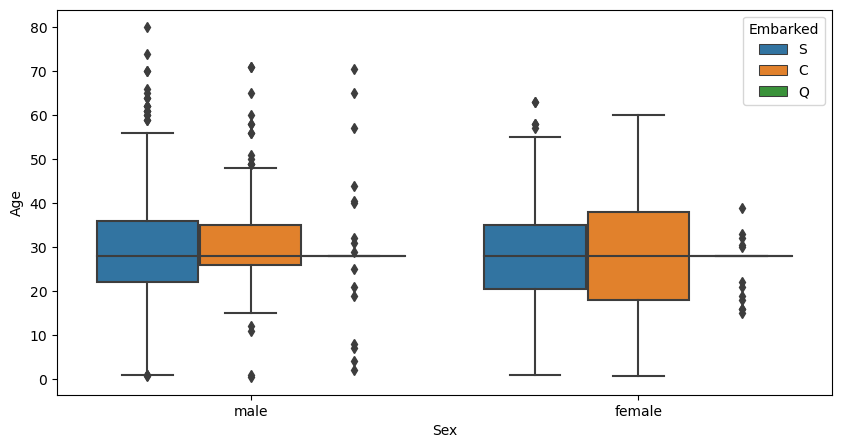

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Sex",y="Age",data=df , hue="Embarked" )
plt.show()

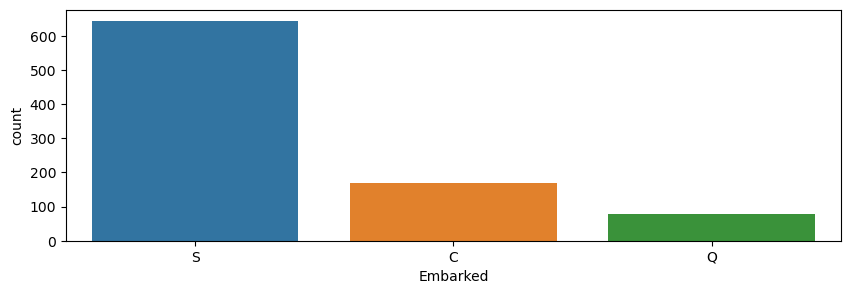

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(x="Embarked",data=df)
plt.show()

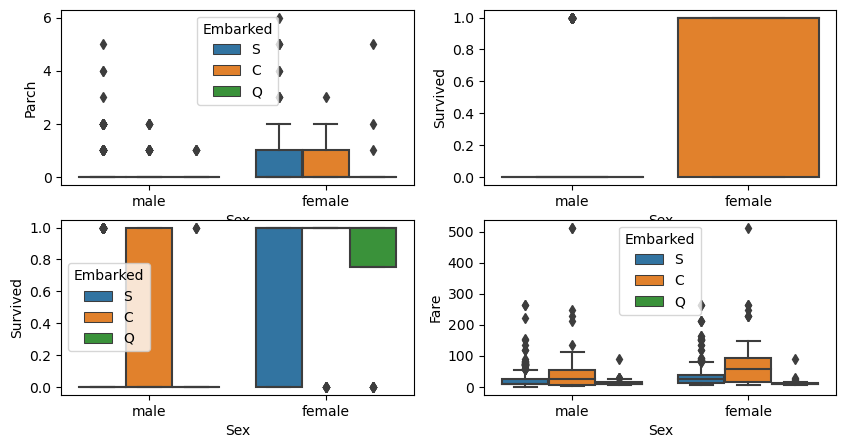

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(x="Sex",y="Parch",data=df , hue="Embarked" )

plt.subplot(2,2,2)
sns.boxplot(x="Sex",y="Survived",data=df )

plt.subplot(2,2,3)
sns.boxplot(x="Sex",y="Survived",data=df , hue="Embarked" )

plt.subplot(2,2,4)
sns.boxplot(x="Sex",y="Fare",data=df , hue="Embarked" )
plt.show()


In [30]:
plt.figure(figsize=(10,5))
sns.displot(x="Fare" , data=df)
plt.show()

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , annot=True)